In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
import pickle

In [3]:
df = pd.read_csv('./datos-prediccion.csv')

In [4]:
df.head()

,Unnamed: 0,PerfScoreID,EmpSatisfaction,Absences,Terminated
0,0,4,5,1,0
1,1,3,3,17,1
2,2,3,3,3,1
3,3,3,5,15,0
4,4,3,4,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       311 non-null    int64
 1   PerfScoreID      311 non-null    int64
 2   EmpSatisfaction  311 non-null    int64
 3   Absences         311 non-null    int64
 4   Terminated       311 non-null    int64
dtypes: int64(5)
memory usage: 12.3 KB


In [6]:
df = df[['EmpSatisfaction', 'Absences']]

In [7]:
df.head()

,EmpSatisfaction,Absences
0,5,1
1,3,17
2,3,3
3,5,15
4,4,2


<AxesSubplot:>

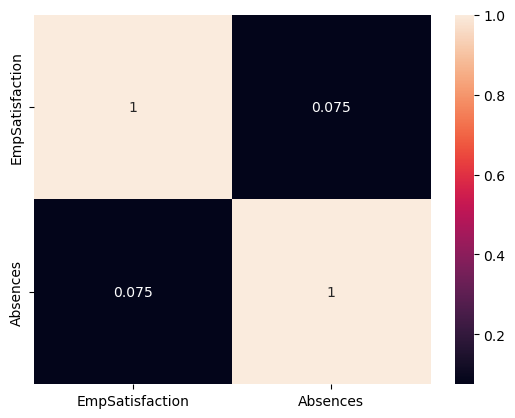

In [8]:
sns.heatmap(df.corr(), annot= True)

''

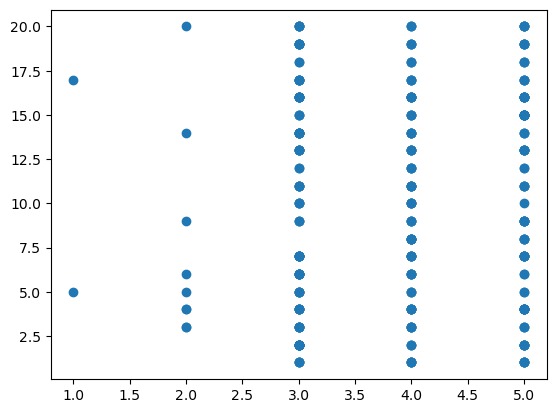

In [9]:
plt.scatter(df['EmpSatisfaction'], df['Absences'])
;

In [10]:
X = df[['EmpSatisfaction']]
Y = df['Absences']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 51)

In [12]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Primer modelo del pipeline
random_forest_params = {
    'regressor': [RandomForestRegressor()],
    'regressor__n_estimators': [50, 100, 150, 200, 250,300,350,400],
    'regressor__max_depth': [4, 5, 6, 7, 8, 9, 10]
}     
                                                                          

#Segundo modelo del pipeline
linear_regressor_params = {
    'regressor': [LinearRegression()]
}

#Tercer modelo del pipeline
lasso_params = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'regressor': [Lasso()],
    'regressor__alpha': np.logspace(-4, 3, 100).tolist(),
    'regressor__max_iter': [50000, 100000, 200000]
}

#Cuarto modelo del pipeline
ridge_params = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'regressor': [Ridge()],
    'regressor__alpha': np.logspace(-4, 3, 100).tolist(),
    'regressor__max_iter': [50000, 100000, 200000]
} 

#Quinto modelo del pipeline
xgb_params = {
    'regressor': [XGBRegressor()],
    'regressor__n_estimators': [10,15,20, 25, 30, 35, 40, 45, 50, 60, 70, 75, 80, 90, 100, 110, 125],
    'regressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,] 
} 

# #Sexto modelo del pipeline - regrasión polinomial
# polinomial_params = {
#     'scaler': [StandardScaler(), MinMaxScaler()],
#     'regressor': [PolynomialFeatures(),],
#     'regressor__degree': [2, 4, 6, 8]
# }

#Lista de todos los clasificadores con sus parámetros
search_space = [linear_regressor_params, xgb_params, # polinomial_params
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  n_jobs= 6,
                  cv = 5, 
                  scoring= 'neg_mean_absolute_error')

#Se entrena el gridsearch
clf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             n_jobs=6,
             param_grid=[{'regressor': [LinearRegression()]},
                         {'regressor': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_cat...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=10,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)],
                          'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4,
                                                       0.5, 0.6, 0.7],
                          'regressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'regressor__n_estimators': [10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 60, 70, 75,
                                                      80, 90, 100, 110, 125]}],
             scoring='neg_mean_absolute_error')

In [13]:
clf.best_params_

{'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'regressor__learning_rate': 0.5,
 'regressor__max_depth': 1,
 'regressor__n_estimators': 10}

In [14]:
mean_absolute_error(clf.predict(X_train), Y_train)

5.197611462685369

In [15]:
mean_absolute_error(clf.predict(X_test), Y_test)

4.8608779982915005

In [16]:
model = clf.best_estimator_
pickle.dump(model, open('./modelo_david.pkl', 'wb'))